**Aprendizaje Automático** - 2024
# Clase 6: Árboles de Decisión (CARTs)


## Contenidos

* Árboles de clasificación
* Árboles de regresión
* Tema extra: Desbalance de clases

# Arboles de Decisión

Scikit-Learn nos provee el módulo [Tree](https://scikit-learn.org/stable/modules/tree.html) en el cuál encontraremos los CARTs: *Classification And Regression Trees*. En esta notebook veremos como ajustar un árbol de decisión para [clasificación](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier), sus hiperparámetros y las regiones de decisión.

## Dataset

Para probar los árboles usaremos dos datasets que crearemos: [moons](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html) y [circles](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_circles.html). También utilizaremos [blobs](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html) que nos permite generar distribuciones Gaussianas.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons, make_blobs, make_circles
from sklearn.dummy import DummyClassifier

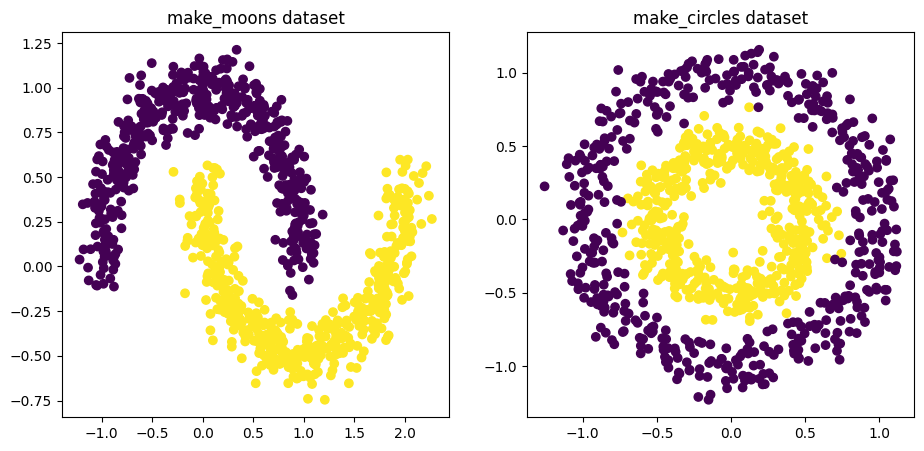

In [2]:
# Crear dataset con make_moons
X_moons, y_moons = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Crear dataset con make_circles
X_circles, y_circles = make_circles(n_samples=1000, noise=0.1, factor=0.5, random_state=42)

# Visualizar ambos datasets
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(11, 5))

ax1.scatter(X_moons[:, 0], X_moons[:, 1], c=y_moons, cmap='viridis')
ax1.set_title('make_moons dataset')

ax2.scatter(X_circles[:, 0], X_circles[:, 1], c=y_circles, cmap='viridis')
ax2.set_title('make_circles dataset')

plt.show()

Separamos los datos en conjuntos de entrenamiento y testeo

In [3]:
# Separar los datos en train y test para make_moons
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(X_moons, y_moons, test_size=0.3, random_state=42)

# Separar los datos en train y test para make_circles
X_train_circles, X_test_circles, y_train_circles, y_test_circles = train_test_split(X_circles, y_circles, test_size=0.3, random_state=42)

## Profundidad de los árboles

Dados estos dos datasets, probaremos en ambos dos árboles diferentes, uno con una profundidad pequeña: `max_depth=2` y otro con una profundidad mayor `max_depth=10`. El objetivo es entender cómo se comportar para una tarea de clasificación y ver las limitaciones.

Los CARTs, como casi todo modelo en scikit-learn, se los utiliza de la misma manera:
1.  Se instancia un modelo, pasándole sus parámetros.
2.  Se ajusta/entrena el modelo mediante el método fit, el cual recibe los datos de entrada y el target
3.  Se predice sobre nuevos datos utilizando el método predict
4.  Se evalua la performance utilizando metricas en el modulo sklearn.metric

In [4]:
# Instanciar árbol de clasificación profundo para make_moons
tree_deep_moons = DecisionTreeClassifier(max_depth=10, random_state=42)

# Instanciar árbol de clasificación no tan profundo para make_moons
tree_shallow_moons = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit de los árboles en make_moons
tree_deep_moons.fit(X_train_moons, y_train_moons)

tree_shallow_moons.fit(X_train_moons, y_train_moons)

DecisionTreeClassifier(max_depth=2, random_state=42)

In [5]:
# Instanciar árbol de clasificación profundo para make_circles
tree_deep_circles = DecisionTreeClassifier(max_depth=10, random_state=42)

# Instanciar árbol de clasificación no tan profundo para make_circles
tree_shallow_circles = DecisionTreeClassifier(max_depth=2, random_state=42)

# Fit de los árboles en make_circles
tree_deep_circles.fit(X_train_circles, y_train_circles)
tree_shallow_circles.fit(X_train_circles, y_train_circles)

DecisionTreeClassifier(max_depth=2, random_state=42)

### Evaluación

In [6]:
# Predicciones en make_moons
y_pred_deep_moons = tree_deep_moons.predict(X_test_moons)
y_pred_shallow_moons = tree_shallow_moons.predict(X_test_moons)

# Accuracy en make_moons
acc_deep_moons = accuracy_score(y_test_moons, y_pred_deep_moons)
acc_shallow_moons = accuracy_score(y_test_moons, y_pred_shallow_moons)

# Predicciones en make_circles
y_pred_deep_circles = tree_deep_circles.predict(X_test_circles)
y_pred_shallow_circles = tree_shallow_circles.predict(X_test_circles)

# Accuracy en make_circles
acc_deep_circles = accuracy_score(y_test_circles, y_pred_deep_circles)
acc_shallow_circles = accuracy_score(y_test_circles, y_pred_shallow_circles)

print(f"Accuracy con árbol profundo en make_moons: {acc_deep_moons}")
print(f"Accuracy con árbol profundo en make_circles: {acc_deep_circles}")
print(f"Accuracy con árbol no tan profundo en make_moons: {acc_shallow_moons}")
print(f"Accuracy con árbol no tan profundo en make_circles: {acc_shallow_circles}")


Accuracy con árbol profundo en make_moons: 1.0
Accuracy con árbol profundo en make_circles: 0.9633333333333334
Accuracy con árbol no tan profundo en make_moons: 0.9233333333333333
Accuracy con árbol no tan profundo en make_circles: 0.7066666666666667


## Visualización

### Frontera de decisión

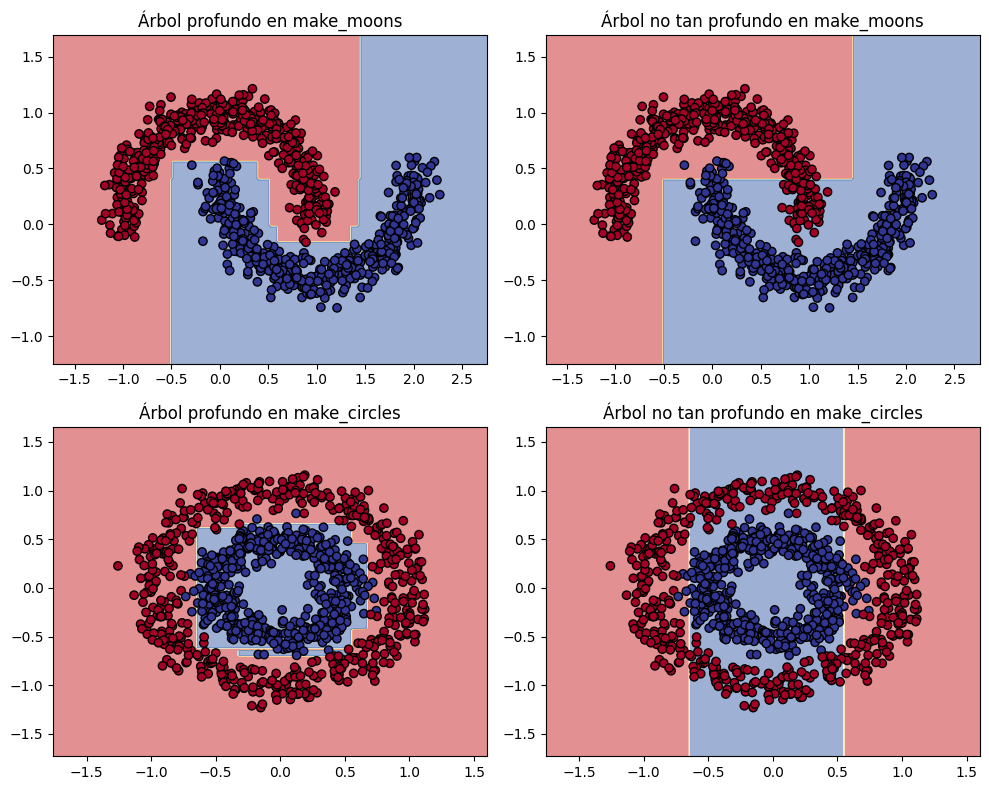

In [7]:
# Nos armamos una función auxiliar para graficar las regiones de decisión de un clasificador
def plot_decision_regions(X, y, classifier, ax):
    # Configurar grilla
    h = 0.02
    x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
    y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    # Predecir clases para cada punto en la grilla
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Graficar regiones de decisión y puntos de entrenamiento
    ax.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.5)
    ax.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='black')

# Graficar regiones de decisión de ambos árboles en ambos datasets
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))
axs[0, 0].set_title("Árbol profundo en make_moons")
plot_decision_regions(X_moons, y_moons, tree_deep_moons, axs[0, 0])
axs[0, 1].set_title("Árbol no tan profundo en make_moons")
plot_decision_regions(X_moons, y_moons, tree_shallow_moons, axs[0, 1])
axs[1, 0].set_title("Árbol profundo en make_circles")
plot_decision_regions(X_circles, y_circles, tree_deep_circles, axs[1, 0])
axs[1, 1].set_title("Árbol no tan profundo en make_circles")
plot_decision_regions(X_circles, y_circles, tree_shallow_circles, axs[1, 1])
plt.tight_layout()
plt.show()

### Cosas a tener en cuenta

* Las fronteras de decisión son ortogonales (solo puede dividir con rectas a 90° entre si).
* Un árbol lo suficientemente profundo podría aproximar *cualquier función matemática* (de las normalitas)
* Modelo más complejo != Modelo que mejor generaliza
* Trabajamos en 2D para poder visualizar las cosas, pero en la práctica, el número de dimensiones, que equivale al número de atributos usados, es mucho mayor a lo que podemos observar.

![alt text](https://pbs.twimg.com/media/Dtq79-1X4AA7lJW.jpg)

(Si no saben quien es [Geoffrey Hinton](https://en.wikipedia.org/wiki/Geoffrey_Hinton), deberían ya que lo llaman [el padrino del Deep Learning](https://www.youtube.com/watch?v=-eyhCTvrEtE&ab_channel=PreserveKnowledge))

### Decisiones del árbol

Podemos tratar de visualizar el árbol y las consiguientes decisiones usando la función [`plot_tree`](https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html#sklearn.tree.plot_tree) de sklearn ([documentación extra](https://scikit-learn.org/stable/modules/tree.html#classification)).

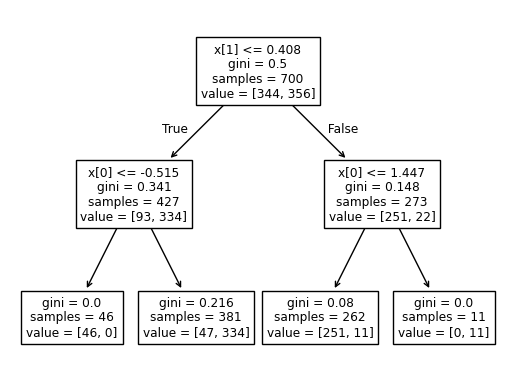

In [8]:
from sklearn.tree import plot_tree
plot_tree(tree_shallow_moons);

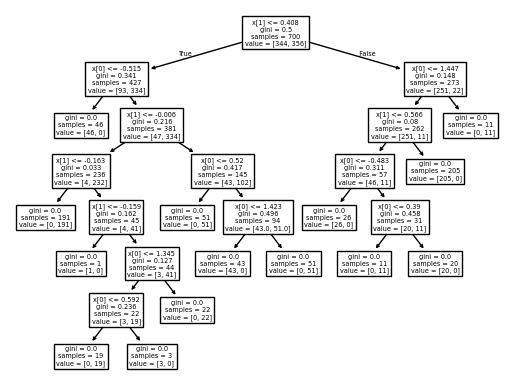

In [9]:
plot_tree(tree_deep_moons);

¿Por qué no es un árbol simétrico como en el anterior caso? (Tip: Analizar cada hoja!)

No es un árbol simétrico porque el árbol de decisión se construye dividiendo los datos en función de las características y los valores que mejor separan las clases en cada nodo, según la métrica de impureza (por ejemplo, gini). En el dataset make_moons, la distribución de los datos hacen que algunas ramas necesiten más divisiones (mayor profundidad) para separar correctamente los puntos, mientras que otras ramas pueden llegar rápidamente a nodos puros o casi puros. Por eso, al analizar cada hoja, se observa que algunas ramas terminan antes (menos nodos) y otras se extienden más, dependiendo de la dificultad para separar los datos en esa región del espacio. 

## Ejercicio 1:

1. Para este ejercicio deberan instanciar un nuevo dataset de `make_moons` con 1000 puntos y `noise=0.2`. Realizar una división de datos en `train` y `test`. Fijen la semilla aleatoria en 2024.
2. Instanciar y entrenar 20 arboles diferentes usando los mismos hiperparametros pero variando la profundidad de 1 a 20.
3. Graficar el accuracy de estos arboles en ambos conjuntos con la profundidad en el eje `x` y accuracy en el eje `y`. ¿A partir de que punto dirían que el arbol esta sobreajustando?
4. Grafique el mejor árbol encontrado.

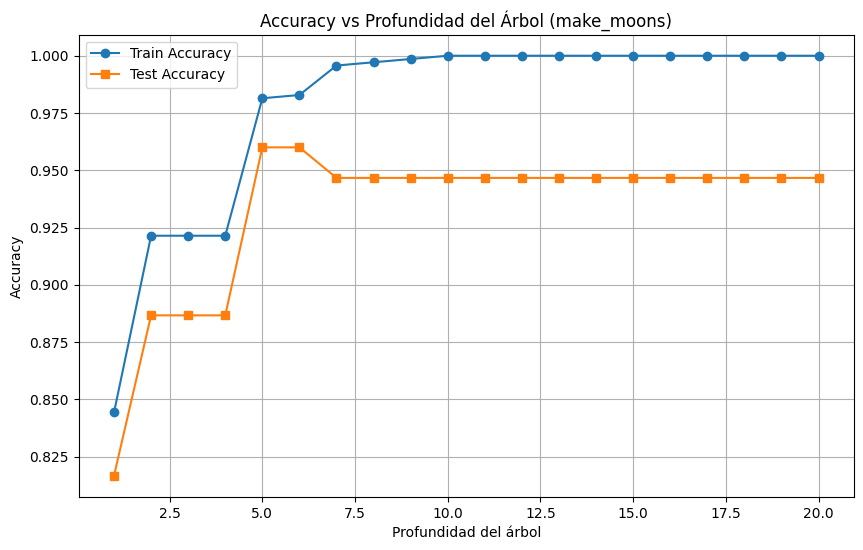

Mejor profundidad: 5, Test Accuracy: 0.960


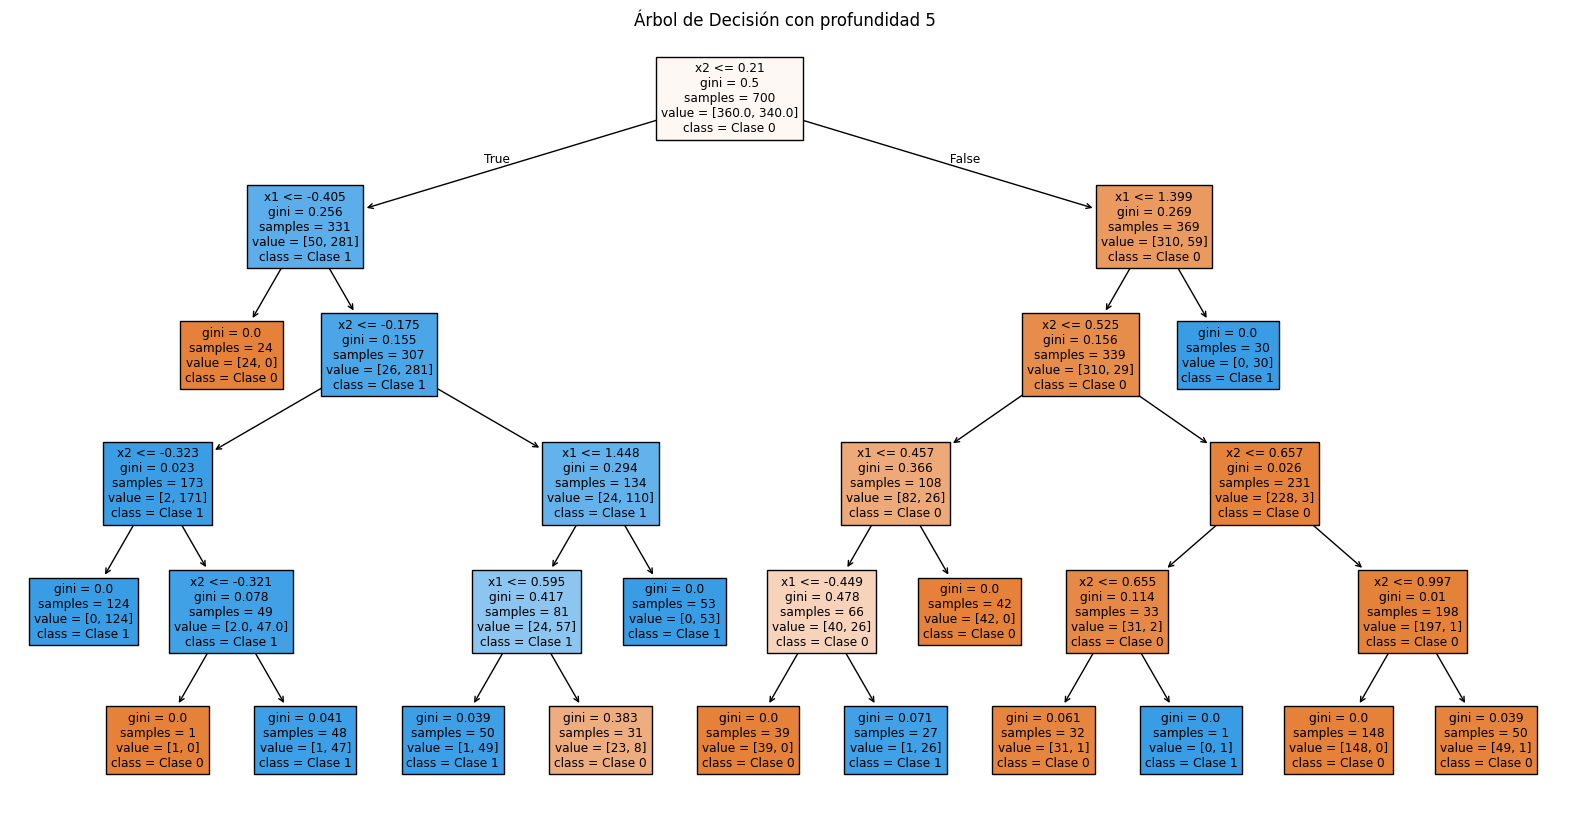

In [10]:
# 1. 
X_moons, y_moons = make_moons(n_samples=1000, noise=0.2, random_state=2024)
X_train_moons, X_test_moons, y_train_moons, y_test_moons = train_test_split(
    X_moons, y_moons, test_size=0.3, random_state=42
)

# 2. 
depths = list(range(1, 21)) # rpofundidades
arboles = []
train_accuracies = []
test_accuracies = []

for d in depths:
    tree = DecisionTreeClassifier(max_depth=d, random_state=2024)
    tree.fit(X_train_moons, y_train_moons)
    arboles.append(tree)
    # 3. Calcular accuracy en train y test
    train_acc = accuracy_score(y_train_moons, tree.predict(X_train_moons))
    test_acc = accuracy_score(y_test_moons, tree.predict(X_test_moons))
    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# 3. Graficar accuracy vs profundidad
plt.figure(figsize=(10,6))
plt.plot(depths, train_accuracies, marker='o', label='Train Accuracy')
plt.plot(depths, test_accuracies, marker='s', label='Test Accuracy')
plt.xlabel('Profundidad del árbol')
plt.ylabel('Accuracy')
plt.title('Accuracy vs Profundidad del Árbol (make_moons)')
plt.legend()
plt.grid(True)
plt.show()

# 4. Graficar el mejor árbol encontrado 
mejor_idx = np.argmax(test_accuracies)
mejor_arbol = arboles[mejor_idx]
print(f"Mejor profundidad: {depths[mejor_idx]}, Test Accuracy: {test_accuracies[mejor_idx]:.3f}")

plt.figure(figsize=(20,10))
plot_tree(mejor_arbol, filled=True, feature_names=['x1', 'x2'], class_names=['Clase 0', 'Clase 1'])
plt.title(f"Árbol de Decisión con profundidad {depths[mejor_idx]}")
plt.show()


## Hiperparámetros - Random Search

Los árboles cuentan con muchos hiperparámetros para elegir, lo cuál los hace muy versátiles pero tienen una gran tendencia a *overfitear* los datos. Muchos de estos hiperparámetros tienen como objetivo controlar la complejidad del modelo y evitar asi el overfitting. Algunos de los más importantes implementados en scikit-learn son los siguientes:

1. `criterion`: la función de calidad utilizada para evaluar la calidad de una división. Las opciones son "gini" para la impureza de Gini y "entropy" para la ganancia de información.

2. `max_depth`: la profundidad máxima del árbol. Este hiperparámetro controla la complejidad del modelo y puede evitar el sobreajuste.

3. `min_samples_split`: el número mínimo de muestras requeridas para dividir un nodo interno. Si el número de muestras en un nodo es menor que este valor, no se realizará la división.

4. `min_samples_leaf`: el número mínimo de muestras requeridas para ser una hoja. Si la cantidad de muestras en un nodo es menor que este valor después de la división, el nodo será considerado una hoja.

5. `max_features`: el número máximo de características a considerar al buscar la mejor división. Si es None, se consideran todas las características.

6. `ccp_alpha`: un parámetro de complejidad efectiva que penaliza árboles con muchas ramas. Este parámetro controla la cantidad de poda que se realiza en el árbol. Un valor más alto de ccp_alpha aumenta la cantidad de poda y puede reducir el sobreajuste.

Una mención extra para el `class_weight` que lo verán en la parte de desbalance.

Dado que son muchos hiperparámetros es necesario un método para optimizar la búsqueda de la combinación óptima. Una forma es utilizando [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html) que es un método de búsqueda de hiperparámetros que en lugar de probar todas las posibles combinaciones, este método elige aleatoriamente un subconjunto de combinaciones para evaluar, lo que lo hace más eficiente en términos de tiempo y recursos.



In [11]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon

# Definir el modelo de árbol de decisión
modelo_a_optimizar = DecisionTreeClassifier()

# Definir el espacio de búsqueda de los hiperparámetros
param_dist = {'criterion': ["gini", "entropy"],
              'max_depth': [3, 5, 7, 10, None],
              'max_features': randint(1, 4),
              'min_samples_split': randint(2, 11),
              'min_samples_leaf': randint(1, 11),
              'ccp_alpha': expon(scale=0.1)}

# Definir la métrica de evaluación
metric = 'accuracy'

# Definir el objeto de búsqueda aleatoria
search = RandomizedSearchCV(modelo_a_optimizar, param_distributions=param_dist, n_iter=1000, cv=5, scoring=metric)

# Entrenar el modelo con la búsqueda aleatoria de hiperparámetros
search.fit(X_train_moons, y_train_moons)

# Obtener los hiperparámetros óptimos
print("Mejores hiperparámetros:", search.best_params_)

# Evaluar el modelo con los hiperparámetros óptimos en el conjunto de prueba
accuracy = search.score(X_test_moons, y_test_moons)
print("Precisión del modelo:", accuracy)

Mejores hiperparámetros: {'ccp_alpha': np.float64(0.0018010773198369363), 'criterion': 'gini', 'max_depth': 7, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 5}
Precisión del modelo: 0.9566666666666667


## Ejercicio 2:

Realice una búsqueda de hiperparámetros para el conjunto de círculos, pero esta vez elija como métrica el ROC AUC, revise la [documentación](https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter) para eso del argumento scoring del RandomizedSearchCV. Explore los hiperparámetros mencionados previamente.

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, expon

modelo_circulos = DecisionTreeClassifier()

# Definir el espacio de búsqueda de los hiperparámetros
param_dist_circulos = {
    'criterion': ["gini", "entropy"],
    'max_depth': [3, 5, 7, 10, None],
    'max_features': randint(1, 4),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 11),
    'ccp_alpha': expon(scale=0.1)
}

# Definir la métrica de evaluación como ROC AUC
metric_circulos = 'roc_auc'

# Definir el objeto de búsqueda aleatoria
search_circulos = RandomizedSearchCV(
    modelo_circulos,
    param_distributions=param_dist_circulos,
    n_iter=1000,
    cv=5,
    scoring=metric_circulos,
    random_state=42
)

# Entrenar el modelo con la búsqueda aleatoria de hiperparámetros
search_circulos.fit(X_train_circles, y_train_circles)

# Obtener los hiperparámetros óptimos
print("Mejores hiperparámetros (circulos):", search_circulos.best_params_)

# Evaluar el modelo con los hiperparámetros óptimos en el conjunto de prueba
roc_auc = search_circulos.score(X_test_circles, y_test_circles)
print("ROC AUC del modelo (circulos):", roc_auc)


Mejores hiperparámetros (circulos): {'ccp_alpha': np.float64(0.0015629842723005945), 'criterion': 'entropy', 'max_depth': 5, 'max_features': 2, 'min_samples_leaf': 6, 'min_samples_split': 10}
ROC AUC del modelo (circulos): 0.9710648148148148


## Arboles de regresión

Scikit-Learn también tiene implementados [árboles de regresión](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeRegressor.html). El árbol de regresión `DecisionTreeRegressor` es una variante del árbol de decisión que se utiliza para problemas de regresión en lugar de clasificación. En lugar de clasificar las muestras en diferentes categorías, el árbol de regresión realiza una predicción numérica del valor de salida para cada muestra.

Al igual que con el árbol de decisión para clasificación, los hiperparámetros del árbol de regresión, como `max_depth`, `min_samples_split`, `min_samples_leaf`, `max_features`, `criterion`, `ccp_alpha`, entre otros, pueden ser ajustados para controlar la complejidad del modelo y evitar el sobreajuste.

---
# Desbalance de clases

El desbalance de clases en la clasificación es un problema común que puede afectar significativamente el rendimiento del modelo. Ocurre cuando la proporción de ejemplos en una clase es mucho menor que en las otras, lo que puede hacer que el modelo esté sesgado hacia la clase mayoritaria y tenga dificultades para reconocer la clase minoritaria. Como resultado, la precisión de la predicción en la clase minoritaria puede ser baja, lo que puede ser problemático en aplicaciones donde la identificación de la clase minoritaria es crucial.

En general el desbalance de clases no es de por sí un problema, pero sí debemos tener en cuenta que nuestras decisiones tienen que tenerlo en cuenta, ¿qué problemas pueden surgir del desbalance?

1. Asumir que la distribución de clases de los conjuntos de datos de entrenamiento y test es la misma cuando no lo es.
2. La métrica que usemos es sensible al desbalance o no.
3. No se tienen suficientes instancias positivas para entrenar un modelo de ML confiable.

Veamos los primeros dos casos en ejemplos. El tercer caso se puede mitigar con tecnicas que oversampling y undersampling que no veremos esta clase.

Primero creemos un data set que sea desbalanceado.

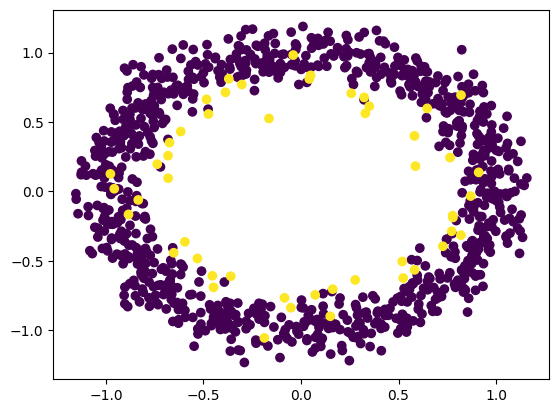

In [13]:
X_desbal, y_desbal = make_circles(n_samples=(950, 50), noise=0.1, shuffle=False, random_state=42)
plt.scatter(X_desbal[:, 0], X_desbal[:, 1], c=y_desbal, cmap='viridis')
plt.show()

## Ejemplo 1

En este ejemplo vamos a ver que problemas pueden suceder con la distribución de clases en train y test y como mitigarlos.

In [14]:
X_train_desbal, X_test_desbal, y_train_desbal, y_test_desbal = train_test_split(X_desbal,y_desbal, shuffle=False)
X_train_desbal.shape, X_test_desbal.shape

((750, 2), (250, 2))

In [ ]:
model = DecisionTreeClassifier(max_depth=10, random_state=42)

# Entrenamos
model.fit(X_train_desbal, y_train_desbal)

print(f"Accuracy en train: {accuracy_score(y_train_desbal, model.predict(X_train_desbal))}")
print(f"Accuracy en test: {accuracy_score(y_test_desbal, model.predict(X_test_desbal))}")

Distribución de clases en y_train_desbal: Counter({np.int64(0): 750})
Distribución de clases en y_test_desbal: Counter({np.int64(0): 200, np.int64(1): 50})
Tamaño de X_train_desbal: (750, 2)
Tamaño de X_test_desbal: (250, 2)
Accuracy en train: 1.0
Accuracy en test: 0.8


¿Qué les parece que sucede con las metricas de accuracy? Observen y comparen que sucede con los tamaños de train y test y la distribución de clases en ambos casos.

In [43]:
# # # COMPLETAR
from collections import Counter

print("Distribución de clases en y_train_desbal:", Counter(y_train_desbal))
print("Distribución de clases en y_test_desbal:", Counter(y_test_desbal))
print(f"Tamaño de X_train_desbal: {X_train_desbal.shape}")
print(f"Tamaño de X_test_desbal: {X_test_desbal.shape}")

## EN el conjunto y_train_desbal no hay puntos de la clase 1 por eso el acuraccy es de 1 mientras que en test si hay piuntos de la clase 1


Distribución de clases en y_train_desbal: Counter({np.int64(0): 750})
Distribución de clases en y_test_desbal: Counter({np.int64(0): 200, np.int64(1): 50})
Tamaño de X_train_desbal: (750, 2)
Tamaño de X_test_desbal: (250, 2)


*Solución:* Para atacar este problema podemos utilizar los hiperparámetros de *shuffle* y *stratify* de [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

## Ejemplo 2

¿Qué pasa con el accuracy cuando hay desbalance? Vamos a comparar un árbol de decisión con un [DummyClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.dummy.DummyClassifier.html) para entender cómo el desbalance puede afectar la clasificación. Pueden ver en la documentación que hará este dummy classifier

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_desbal,y_desbal, stratify=y_desbal, random_state=123) # shuffle por default es True

mi_arbolito = DecisionTreeClassifier(max_depth=5, random_state=42)

# Entrenamos el arbol ahora manteniendo la distribución de train y test
mi_arbolito.fit(X_train, y_train)

print(f"Accuracy en test del arbol: {accuracy_score(y_test, mi_arbolito.predict(X_test))}")

Accuracy en test del arbol: 0.952


In [45]:
# Ahora instanciamos un modelo "dummy"
mi_modelo_dummy = DummyClassifier(strategy='most_frequent')
mi_modelo_dummy.fit(X_train, y_train)
print(f"Accuracy en test del modelo 'tonto': {accuracy_score(y_test, mi_modelo_dummy.predict(X_test))}")

Accuracy en test del modelo 'tonto': 0.952


Los dos modelos tienen el mismo rendiemiento! ¿Eso quiere decir que tenemos un buen modelo? ¿Cuál es mejor? Miremos en detalle que esta pasando con ambos modelos, para eso es bueno mirar que sucede con la matriz de confusión. *Hint:* Pueden tratar de graficar las regiones de decisión para estos modelos y entender que esta pasando.

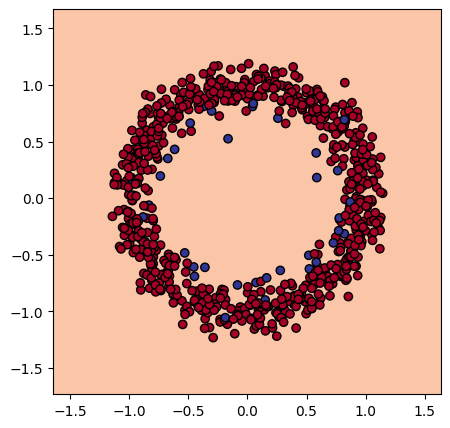

In [46]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_decision_regions(X_train, y_train, mi_arbolito, axs)

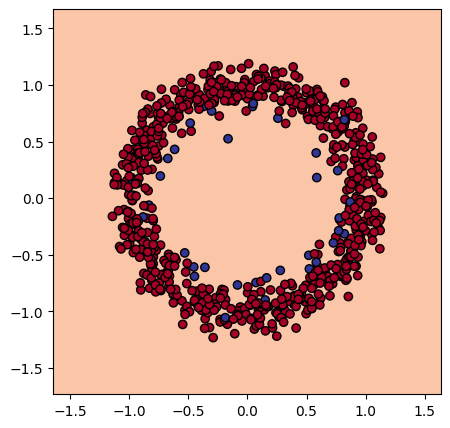

In [47]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(5, 5))
plot_decision_regions(X_train, y_train, mi_modelo_dummy, axs)

Veamos el reporte de resultados `mi_arbolito`

In [48]:
# Nuestro arbol
print(classification_report(y_test, mi_arbolito.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       238
           1       0.00      0.00      0.00        12

    accuracy                           0.95       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.95      0.93       250



c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Veamos el reporte de resultados de `mi_modelo_dummy`


In [49]:
# Nuestro modelo Dummy
print(classification_report(y_test, mi_modelo_dummy.predict(X_test)))

              precision    recall  f1-score   support

           0       0.95      1.00      0.98       238
           1       0.00      0.00      0.00        12

    accuracy                           0.95       250
   macro avg       0.48      0.50      0.49       250
weighted avg       0.91      0.95      0.93       250



c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Federico\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

Fijense que tenemos unos *Warnings*, ¿qué sucede? Veamos el modelo

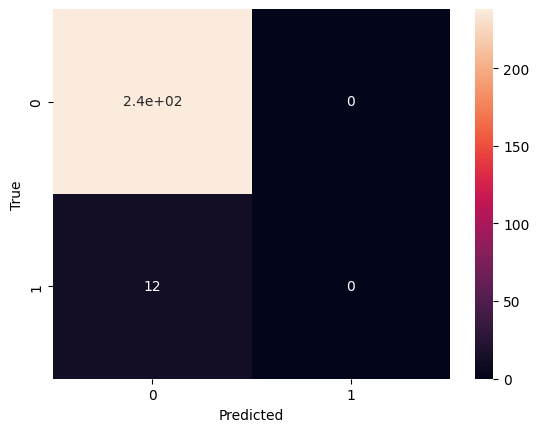

In [50]:
_, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,mi_arbolito.predict(X_test)), annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
plt.show()

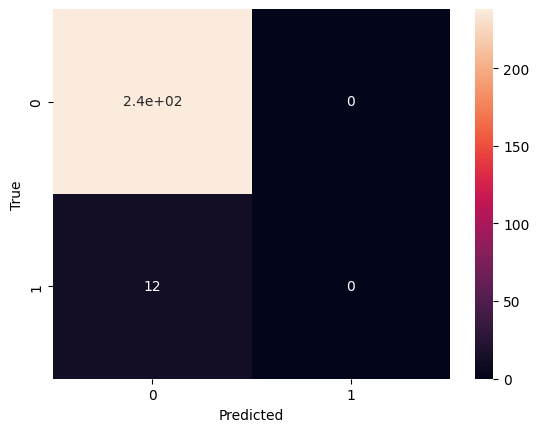

In [51]:
_, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,mi_modelo_dummy.predict(X_test)), annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
plt.show()

Lo que esta sucediendo que es estamos usando `accuracy` la cual es una métrica que le da la misma importancia a los *True Positives* como a los *True Negatives*. **En el caso de un fuerte desbalance el accuracy es malo para medir que tan buenos son nuestros modelos**, porque de esa manera nuestro modelo Dummy que predice siempre la clase mayoritaria (es decir devuelve constantemente 0 sin importar los features, por eso en predicted de la matriz de confusión hay todos 0 y por eso tenemos los warnings previamente) fue igual de bueno que un árbol entrenado en esos datos.

Ĺos árboles de decisión nos permiten tener en cuenta el desbalance durante su entrenamiento a partir de darle a cada instancia un peso relativo a su distribución, es decir, clasificar bien una clase más infrecuente pesa más que una clase muy frecuente. Para eso existe el hiperparámetro `class_weight`.

In [52]:
mi_arbolito_balanceado = DecisionTreeClassifier(max_depth=5, class_weight="balanced", random_state=42)

mi_arbolito_balanceado.fit(X_train, y_train)

print(f"Accuracy en test del arbol sin balancear: {accuracy_score(y_test, mi_arbolito.predict(X_test))}")
print(f"Accuracy en test del arbol balanceado: {accuracy_score(y_test, mi_arbolito_balanceado.predict(X_test))}")

Accuracy en test del arbol sin balancear: 0.952
Accuracy en test del arbol balanceado: 0.584


Ahora el árbol balanceado consideró que cada clasificar bien cada muestra no es lo mismo, entonces nos devuelve una métrica más realista como el [*balanced accuracy*](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html). AUC sobretodo pero también F1, precision y recall son buenas métricas en estos escenarios, en el cual la clase de interés esta fuertemente bajamente representada. Este tipo de escenarios es frecuente en los problemas de detección de anomalías o detección de fraude.

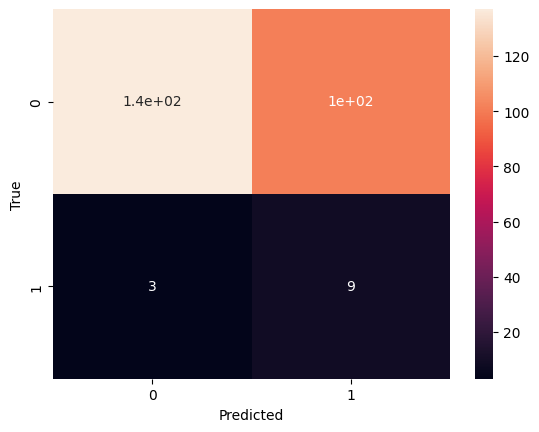

In [53]:
_, ax = plt.subplots()
sns.heatmap(confusion_matrix(y_test,mi_arbolito_balanceado.predict(X_test)), annot=True)
ax.set_ylabel('True')
ax.set_xlabel('Predicted')
plt.show()